In [58]:
from __future__ import print_function
import numpy as np
import pandas as pd
#!pip install --upgrade pip
#!pip install xlrd

#%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [59]:
import os
os_name = os.sys.platform

#Mac Path
if os_name == 'darwin':
    filePath = '/Users/igoeja/Documents/GitHub/DataAnalytics/Data/owid-covid-data w gini.csv'
else:
    filePath = 'c:\\Users\\igoej\\OneDrive\\Documents\\GitHub\\DataAnalytics\\Data\\owid-covid-data w gini.csv'

df = pd.read_csv(filePath)
df = df[df['continent'] == 'Europe']


In [60]:
df.tail()

,iso_code,continent,location,Gini,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
129,ESP,Europe,Spain,34.7,2021-05-06,3559222,7960,6325.714,78726.0,160.0,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56,0.904
133,SWE,Europe,Sweden,30.0,2021-05-06,1002121,6526,4920.429,14158.0,7.0,...,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,2.22,82.80,0.945
134,CHE,Europe,Switzerland,33.1,2021-05-06,669067,1687,1560.571,10695.0,10.0,...,12.644,57410.166,NaN,99.739,5.59,22.6,28.9,4.53,83.78,0.955
144,UKR,Europe,Ukraine,26.6,2021-05-06,2152280,6159,5485.714,47331.0,381.0,...,11.133,7894.393,0.1,539.849,7.11,13.5,47.4,8.80,72.06,0.779
146,GBR,Europe,United Kingdom,35.1,2021-05-06,4444262,2618,2059.000,127843.0,13.0,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32,0.932


In [61]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

In [62]:
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [63]:
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

In [64]:
def MedianFunction(df, roundValue):
    import statistics as stat
    cleaned = df.dropna()
    return round(stat.median(cleaned), roundValue)

In [65]:
def AverageFunction(df, roundValue):
    cleaned = df.dropna()
    return round(sum(cleaned)/len(cleaned), roundValue)

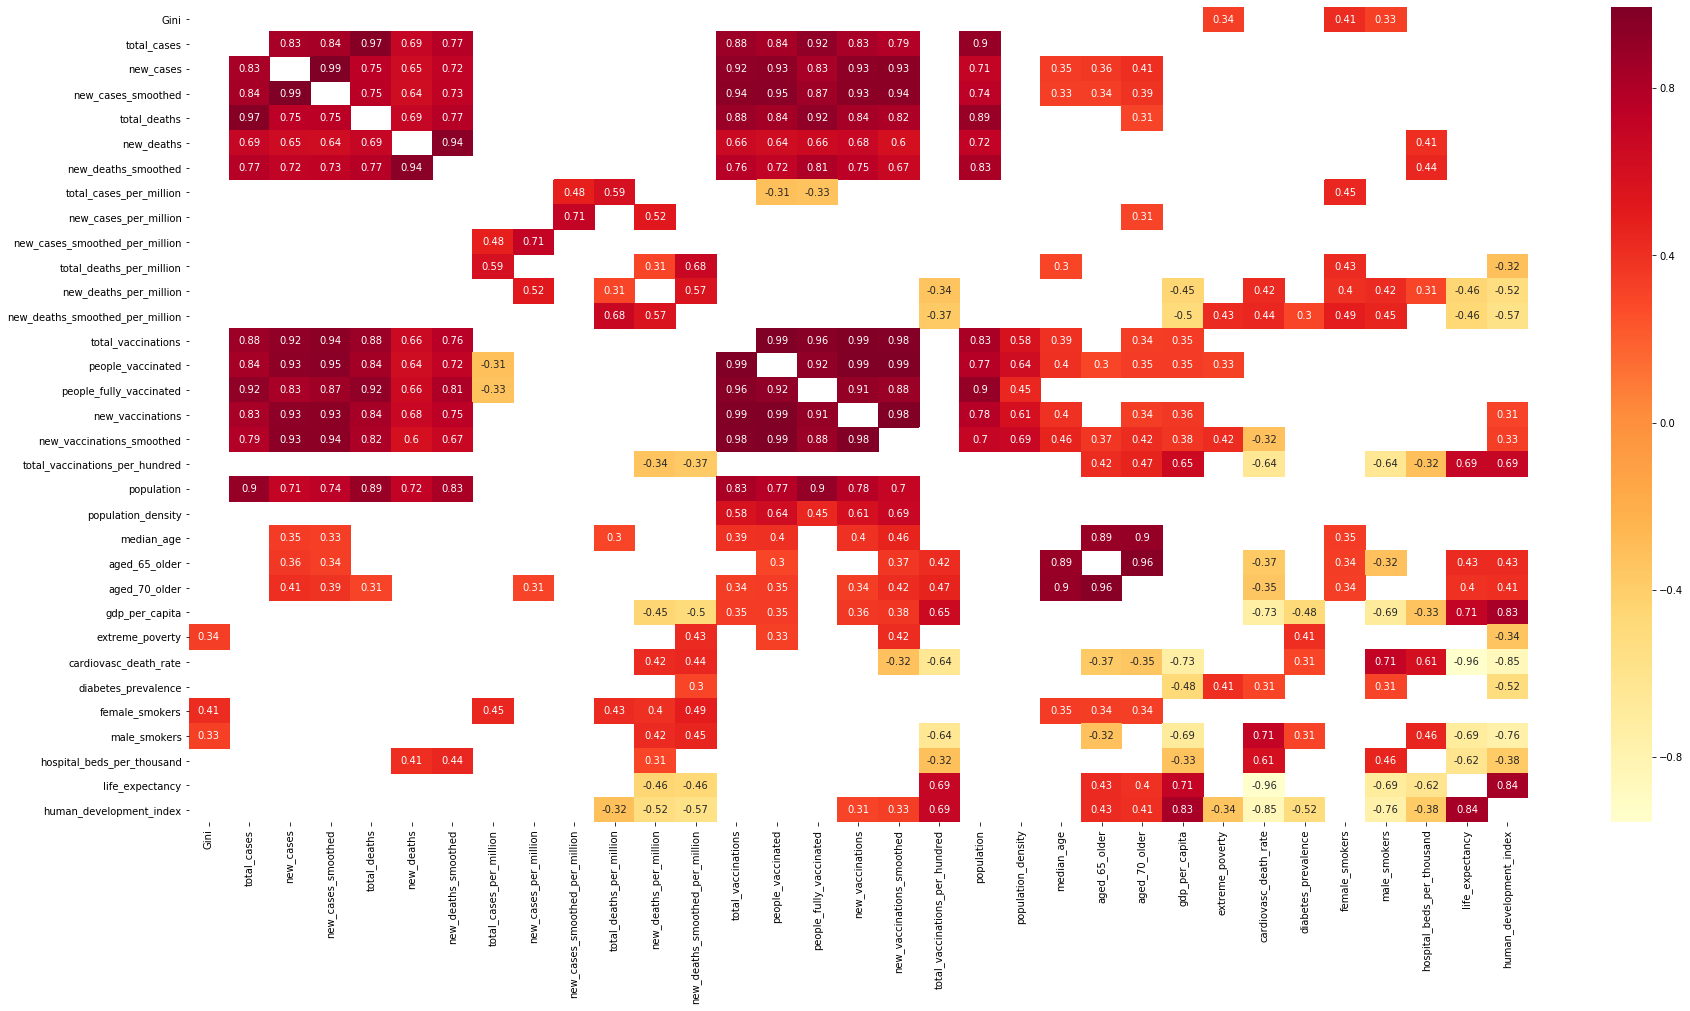

In [66]:
#set data set for analysis
filterValue = 0.3
plt.figure(figsize=(30,15))
sns.heatmap(corrFilter(df, filterValue), annot=True, cmap="YlOrRd")
plt.show()

In [67]:
corr_fit_filtered = corrFilterFlattened(df, filterValue)
half = corr_fit_filtered.count() / 2
corr_fit_filtered

cardiovasc_death_rate      life_expectancy           -0.956895
                           human_development_index   -0.852472
human_development_index    male_smokers              -0.760293
cardiovasc_death_rate      gdp_per_capita            -0.730926
male_smokers               life_expectancy           -0.692434
                                                        ...   
new_vaccinations_smoothed  people_vaccinated          0.990509
new_cases_smoothed         new_cases                  0.992479
new_vaccinations           people_vaccinated          0.993471
people_vaccinated          total_vaccinations         0.994154
Gini                       Gini                            NaN
Length: 176, dtype: float64

In [68]:
df.describe()

,Gini,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,41.000000,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,39.000000,41.000000,30.000000,40.000000,40.000000,39.000000,39.000000,40.000000,40.000000,40.000000
mean,31.300000,1.109071e+06,3085.268293,2662.080098,25142.073171,71.634146,60.334488,70891.821390,225.720585,175.692195,...,11.771128,32787.426854,0.903333,233.185025,6.543250,23.258974,35.535897,5.052025,79.358500,0.879200
std,4.137149,1.517932e+06,4727.566213,4250.958366,36776.144326,120.577310,91.362581,30762.129993,199.395813,130.193017,...,2.258037,17862.244168,1.299200,126.553868,2.080638,7.739805,10.798379,2.015441,3.444981,0.058323
min,24.600000,6.500000e+03,3.000000,4.857000,29.000000,0.000000,0.000000,15896.496000,8.791000,14.233000,...,6.955000,5189.972000,0.100000,86.060000,3.280000,5.900000,15.200000,2.220000,71.900000,0.750000
25%,28.100000,1.315100e+05,373.000000,355.286000,2406.000000,5.000000,4.143000,50928.390000,82.549000,76.300000,...,9.815000,22669.797000,0.200000,125.378500,4.880000,19.600000,27.550000,3.372500,76.672500,0.828750
50%,31.400000,3.649510e+05,1366.000000,1102.571000,8762.000000,21.000000,21.857000,69670.901000,173.907000,146.330000,...,11.976000,30155.152000,0.500000,172.203000,5.860000,23.000000,34.800000,4.520000,80.940000,0.890000
75%,34.700000,1.062527e+06,3418.000000,2059.000000,28297.000000,69.000000,61.714000,84952.010000,319.042000,222.510000,...,13.352500,42658.576000,0.925000,332.973500,7.740000,27.800000,44.500000,6.575000,82.257500,0.931250
max,41.300000,5.789283e+06,21742.000000,19392.857000,127843.000000,511.000000,352.000000,156102.423000,1022.365000,523.381000,...,16.240000,94277.965000,5.700000,539.849000,10.080000,44.000000,58.300000,11.000000,83.780000,0.957000


In [69]:
for col in df.columns:
    print(col)

iso_code
continent
location
Gini
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
total_vaccinations
people_vaccinated
people_fully_vaccinated
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cardiovasc_death_rate
diabetes_prevalence
female_smokers
male_smokers
hospital_beds_per_thousand
life_expectancy
human_development_index


In [70]:
filterForLabels(corr_fit_filtered, 'total_deaths_per_million')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):
/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
female_smokers,0.429460
human_development_index,-0.315316
median_age,0.304908
new_deaths_per_million,0.305697
new_deaths_smoothed_per_million,0.677232
total_cases_per_million,0.594459


In [71]:
filterForLabels(corr_fit_filtered, 'total_cases_per_million')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
female_smokers,0.449147
new_cases_smoothed_per_million,0.481700
people_fully_vaccinated,-0.330195
people_vaccinated,-0.314206
total_deaths_per_million,0.594459


In [72]:
filterForLabels(corr_fit_filtered, 'life_expectancy')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
aged_65_older,0.425114
aged_70_older,0.395649
cardiovasc_death_rate,-0.956895
gdp_per_capita,0.706670
hospital_beds_per_thousand,-0.617170
human_development_index,0.835113
male_smokers,-0.692434
new_deaths_per_million,-0.459440
new_deaths_smoothed_per_million,-0.464521
total_vaccinations_per_hundred,0.689706


In [73]:
filterForLabels(corr_fit_filtered, 'gdp_per_capita')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
cardiovasc_death_rate,-0.730926
diabetes_prevalence,-0.483849
hospital_beds_per_thousand,-0.330760
human_development_index,0.827663
life_expectancy,0.706670
male_smokers,-0.687649
new_deaths_per_million,-0.451162
new_deaths_smoothed_per_million,-0.504218
new_vaccinations,0.363035
new_vaccinations_smoothed,0.384106


In [74]:
filterForLabels(corr_fit_filtered, 'extreme_poverty')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
Gini,0.336687
diabetes_prevalence,0.409695
human_development_index,-0.335548
new_deaths_smoothed_per_million,0.428169
new_vaccinations_smoothed,0.420230
people_vaccinated,0.328473


In [75]:
filterForLabels(corr_fit_filtered, 'Gini')

/Users/igoeja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Corr
Gini,0.000000
extreme_poverty,0.336687
female_smokers,0.414990
male_smokers,0.329760
